<a href="https://colab.research.google.com/github/danco87/Challenge_Data_Cleaning/blob/master/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import missingno as msno

In [0]:
warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)


engine.dispose()

In [4]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [6]:
education_df.nunique()

PRIMARY_KEY                     1487
STATE                             80
YEAR                              26
ENROLL                          1224
TOTAL_REVENUE                   1274
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1251
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1222
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1261
GRADES_KG_G                     1348
GRADES_4_G                      1340
GRADES_8_G                      1347
GRADES_12_G                     1342
GRADES_1_8_G                    1360
GRADES_9_12_G                   1358
GRADES_ALL_G                    1318
AVG_MATH_4_SCORE                 535
AVG_MATH_8_SCORE                 531
AVG_READING_4_SCORE              532
AVG_READING_8_SCORE              497
dtype: int64

In [23]:
education_df.isnull().sum()*100/education_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

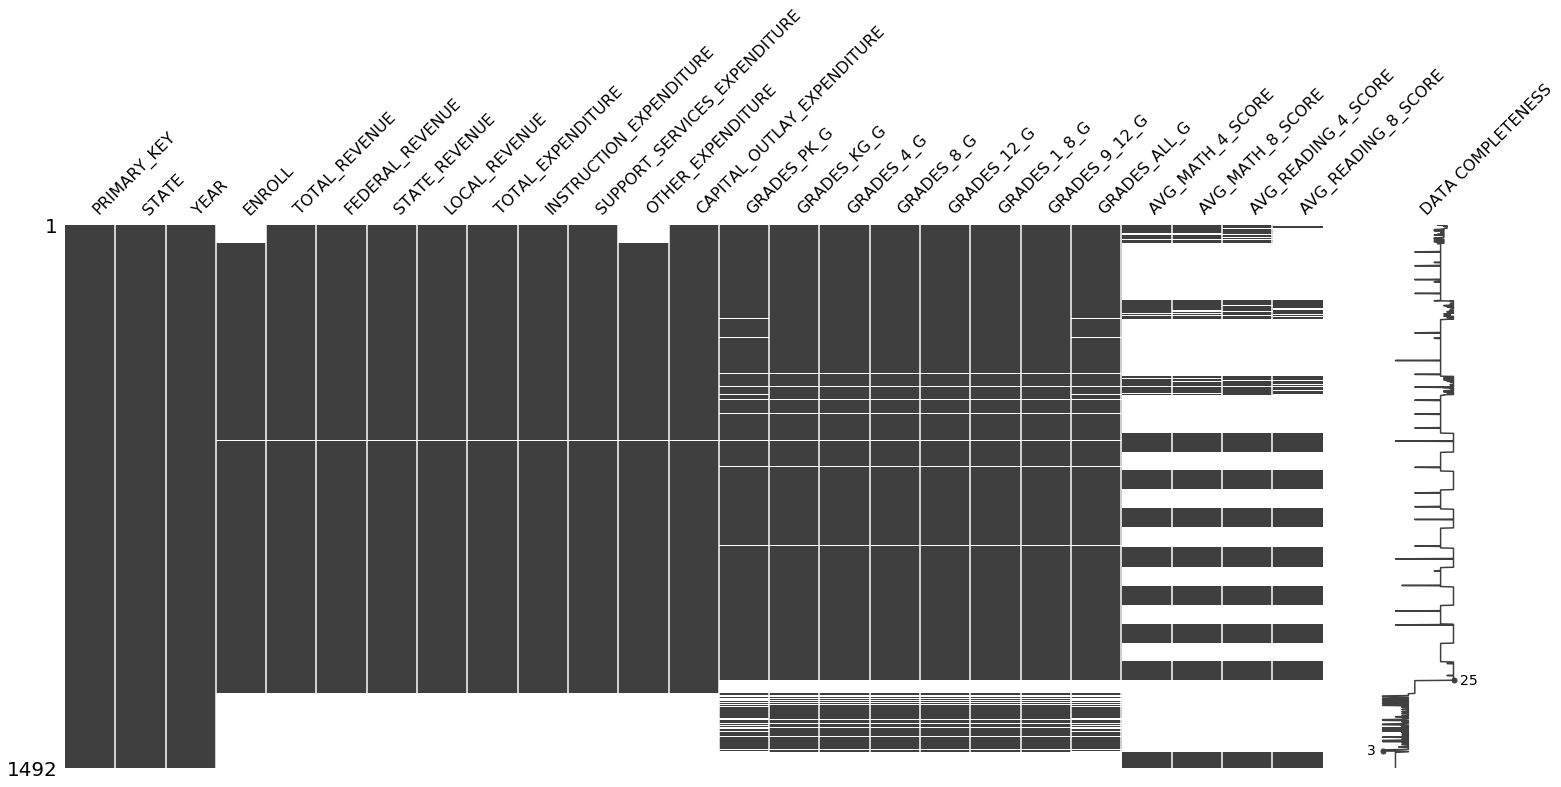

In [8]:
msno.matrix(education_df, labels=True)

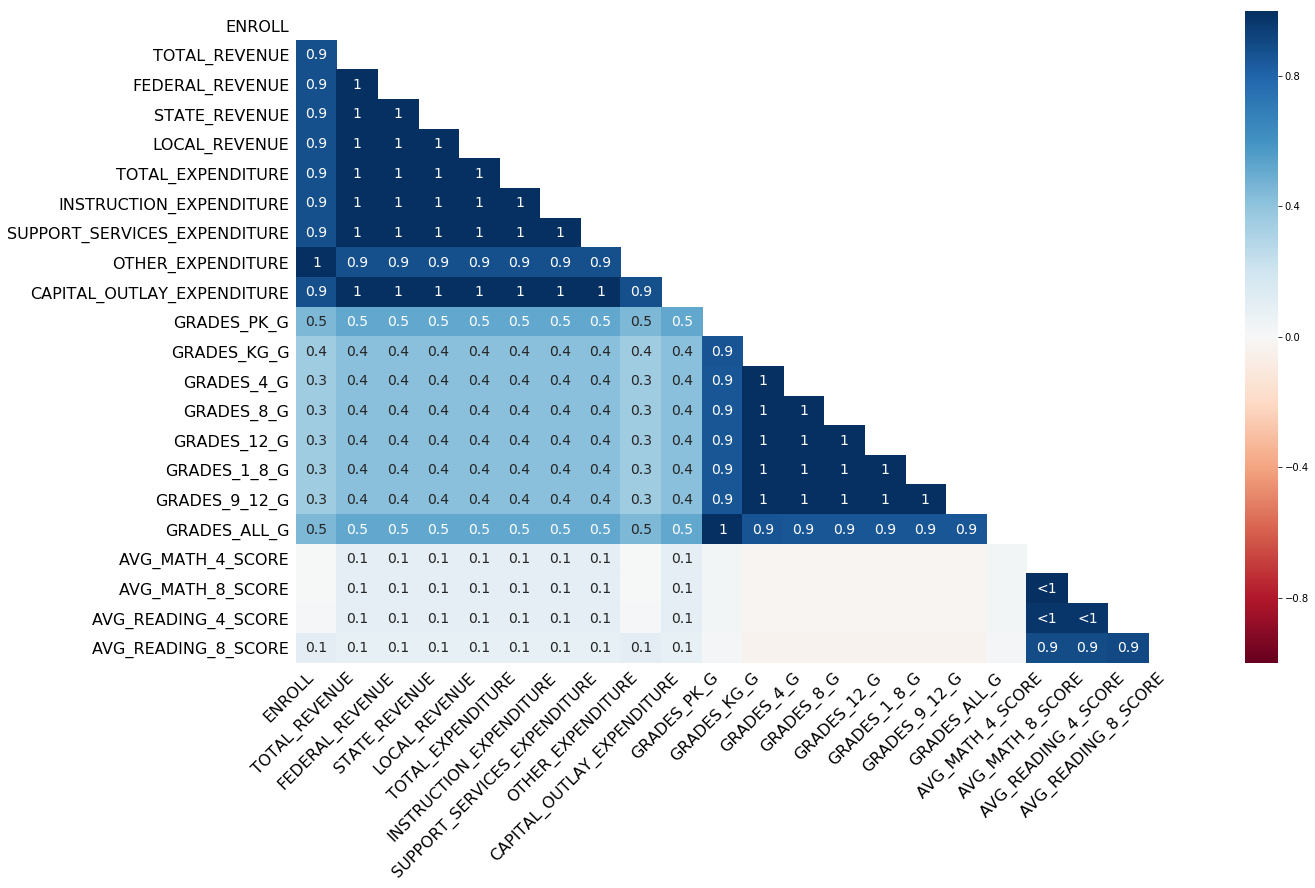

In [9]:
msno.heatmap(education_df)

In [0]:
ed2_df = education_df.copy()

In [0]:
def mean_2(x):
  return x.mean()

In [0]:
res = ed2_df.apply(lambda x: x.fillna(mean_2) if x.dtype.kind in 'biufc' else x.fillna('.'))

In [18]:
ed2_df.isnull().sum()*100/education_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [19]:
ed2_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,429204.616762,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,429204.616762,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,429204.616762,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,429204.616762,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,429204.616762,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


In [22]:
education_df.mean()

YEAR                            2.004434e+03
ENROLL                          9.159308e+05
TOTAL_REVENUE                   9.092082e+06
FEDERAL_REVENUE                 7.663723e+05
STATE_REVENUE                   4.216553e+06
LOCAL_REVENUE                   4.109157e+06
TOTAL_EXPENDITURE               9.196681e+06
INSTRUCTION_EXPENDITURE         4.762966e+06
SUPPORT_SERVICES_EXPENDITURE    2.680331e+06
OTHER_EXPENDITURE               4.292046e+05
CAPITAL_OUTLAY_EXPENDITURE      9.027693e+05
GRADES_PK_G                     1.760161e+04
GRADES_KG_G                     6.374676e+04
GRADES_4_G                      6.453893e+04
GRADES_8_G                      6.427106e+04
GRADES_12_G                     5.426892e+04
GRADES_1_8_G                    5.192140e+05
GRADES_9_12_G                   2.470714e+05
GRADES_ALL_G                    8.024415e+05
AVG_MATH_4_SCORE                2.347683e+02
AVG_MATH_8_SCORE                2.784147e+02
AVG_READING_4_SCORE             2.188662e+02
AVG_READIN

In [21]:
ed2_df.mean()

YEAR                            2.004434e+03
ENROLL                          9.159308e+05
TOTAL_REVENUE                   9.092082e+06
FEDERAL_REVENUE                 7.663723e+05
STATE_REVENUE                   4.216553e+06
LOCAL_REVENUE                   4.109157e+06
TOTAL_EXPENDITURE               9.196681e+06
INSTRUCTION_EXPENDITURE         4.762966e+06
SUPPORT_SERVICES_EXPENDITURE    2.680331e+06
OTHER_EXPENDITURE               4.292046e+05
CAPITAL_OUTLAY_EXPENDITURE      9.027693e+05
GRADES_PK_G                     1.760161e+04
GRADES_KG_G                     6.374676e+04
GRADES_4_G                      6.453893e+04
GRADES_8_G                      6.427106e+04
GRADES_12_G                     5.426892e+04
GRADES_1_8_G                    5.192140e+05
GRADES_9_12_G                   2.470714e+05
GRADES_ALL_G                    8.024415e+05
AVG_MATH_4_SCORE                2.347683e+02
AVG_MATH_8_SCORE                2.784147e+02
AVG_READING_4_SCORE             2.188662e+02
AVG_READIN

In [30]:
res3.mean()

YEAR                            2.004434e+03
ENROLL                          9.382327e+05
TOTAL_REVENUE                   9.080699e+06
FEDERAL_REVENUE                 7.655791e+05
STATE_REVENUE                   4.213594e+06
LOCAL_REVENUE                   4.101526e+06
TOTAL_EXPENDITURE               9.184187e+06
INSTRUCTION_EXPENDITURE         4.756255e+06
SUPPORT_SERVICES_EXPENDITURE    2.676937e+06
OTHER_EXPENDITURE               4.346810e+05
CAPITAL_OUTLAY_EXPENDITURE      9.017556e+05
GRADES_PK_G                     1.065165e+04
GRADES_KG_G                     5.535139e+04
GRADES_4_G                      5.582756e+04
GRADES_8_G                      5.547851e+04
GRADES_12_G                     4.521889e+04
GRADES_1_8_G                    4.490468e+05
GRADES_9_12_G                   2.099938e+05
GRADES_ALL_G                    6.890294e+05
AVG_MATH_4_SCORE                1.824020e+02
AVG_MATH_8_SCORE                1.805619e+02
AVG_READING_4_SCORE             2.218464e+02
AVG_READIN

In [0]:
ed3_df = education_df.copy()

In [0]:
res3 = ed3_df.interpolate(method='polynomial', order=2)

In [29]:
ed3_df.isnull().sum()*100/education_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [28]:
res3.isnull().sum()*100/education_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          16.219839
TOTAL_REVENUE                   13.806971
FEDERAL_REVENUE                 13.806971
STATE_REVENUE                   13.806971
LOCAL_REVENUE                   13.806971
TOTAL_EXPENDITURE               13.806971
INSTRUCTION_EXPENDITURE         13.806971
SUPPORT_SERVICES_EXPENDITURE    13.806971
OTHER_EXPENDITURE               16.219839
CAPITAL_OUTLAY_EXPENDITURE      13.806971
GRADES_PK_G                      3.083110
GRADES_KG_G                      3.016086
GRADES_4_G                       3.016086
GRADES_8_G                       3.016086
GRADES_12_G                      3.016086
GRADES_1_8_G                     3.016086
GRADES_9_12_G                    3.016086
GRADES_ALL_G                     3.083110
AVG_MATH_4_SCORE                 0.000000
AVG_MATH_8_SCORE                 0.000000
AVG_READING_4_SCORE              0